In [79]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [89]:
amazon_data_training = pd.read_csv("./amazon_review_ID.shuf.lrn.csv")
amazon_data_training.describe()


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1124.50000,11.760000,7.473333,6.801333,6.578667,6.260000,4.665333,3.764000,3.580000,2.957333,...,0.208000,0.188000,0.220000,0.208000,0.208000,0.201333,0.198667,0.196000,0.204000,0.209333
std,216.65064,5.609071,3.525790,3.496975,3.782974,3.403505,2.911924,4.065424,2.346688,2.127019,...,0.533963,0.571336,0.507224,0.659279,0.518743,0.493751,0.455494,0.479469,0.464764,0.556710
min,750.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,937.25000,8.000000,5.000000,4.000000,4.000000,4.000000,2.250000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1124.50000,11.000000,7.000000,6.000000,6.000000,6.000000,4.000000,2.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1311.75000,15.000000,10.000000,9.000000,9.000000,8.000000,6.000000,6.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1499.00000,32.000000,19.000000,20.000000,23.000000,21.000000,15.000000,20.000000,15.000000,12.000000,...,4.000000,6.000000,4.000000,6.000000,5.000000,4.000000,3.000000,4.000000,3.000000,4.000000


In [101]:
amazon_data_test = pd.read_csv("./amazon_review_ID.shuf.tes.csv")
amazon_data_test.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1124.50000,11.760000,7.473333,6.801333,6.578667,6.260000,4.665333,3.764000,3.580000,2.957333,...,0.208000,0.188000,0.220000,0.208000,0.208000,0.201333,0.198667,0.196000,0.204000,0.209333
std,216.65064,5.609071,3.525790,3.496975,3.782974,3.403505,2.911924,4.065424,2.346688,2.127019,...,0.533963,0.571336,0.507224,0.659279,0.518743,0.493751,0.455494,0.479469,0.464764,0.556710
min,750.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,937.25000,8.000000,5.000000,4.000000,4.000000,4.000000,2.250000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1124.50000,11.000000,7.000000,6.000000,6.000000,6.000000,4.000000,2.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1311.75000,15.000000,10.000000,9.000000,9.000000,8.000000,6.000000,6.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1499.00000,32.000000,19.000000,20.000000,23.000000,21.000000,15.000000,20.000000,15.000000,12.000000,...,4.000000,6.000000,4.000000,6.000000,5.000000,4.000000,3.000000,4.000000,3.000000,4.000000


In [82]:
amazon_data_training.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,22,11,7,11,7,2,0,3,1,...,0,0,0,0,0,0,0,0,0,Lee
1,1,11,6,6,3,7,4,5,3,3,...,0,0,0,0,0,0,0,0,0,Corn
2,2,11,2,2,5,5,2,6,3,5,...,1,0,0,0,1,0,0,0,0,Lee
3,3,13,8,8,4,2,2,7,6,2,...,0,0,0,0,0,1,0,0,0,Brody
4,4,8,6,6,6,6,4,1,5,0,...,0,0,1,0,0,0,0,0,1,Kolln


In [83]:
amazon_data_training.info()
reviews_count=amazon_data_training["Class"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10002 entries, ID to Class
dtypes: int64(10001), object(1)
memory usage: 57.2+ MB


[Text(0, 0, 'Lee'),
 Text(1, 0, 'Corn'),
 Text(2, 0, 'Brody'),
 Text(3, 0, 'Kolln'),
 Text(4, 0, 'CFH'),
 Text(5, 0, 'Taylor'),
 Text(6, 0, 'Bukowsky'),
 Text(7, 0, 'Morrison'),
 Text(8, 0, 'Wilson'),
 Text(9, 0, 'Comdet'),
 Text(10, 0, 'Harp'),
 Text(11, 0, 'Vernon'),
 Text(12, 0, 'Chandler'),
 Text(13, 0, 'Cholette'),
 Text(14, 0, 'Lovitt'),
 Text(15, 0, 'Goonan'),
 Text(16, 0, 'Messick'),
 Text(17, 0, 'Mitchell'),
 Text(18, 0, 'Power'),
 Text(19, 0, 'Cutey'),
 Text(20, 0, 'Sherwin'),
 Text(21, 0, 'Vision'),
 Text(22, 0, 'Ashbacher'),
 Text(23, 0, 'Merritt'),
 Text(24, 0, 'McKee'),
 Text(25, 0, 'Grove'),
 Text(26, 0, 'Dent'),
 Text(27, 0, 'Auken'),
 Text(28, 0, 'Mark'),
 Text(29, 0, 'Neal'),
 Text(30, 0, 'Peterson'),
 Text(31, 0, 'Hayes'),
 Text(32, 0, 'Riley'),
 Text(33, 0, 'Johnson'),
 Text(34, 0, 'Janson'),
 Text(35, 0, 'Brown'),
 Text(36, 0, 'Agresti'),
 Text(37, 0, 'Lawyeraau'),
 Text(38, 0, 'Nigam'),
 Text(39, 0, 'Davisson'),
 Text(40, 0, 'Mahlers2nd'),
 Text(41, 0, 'Walters'),

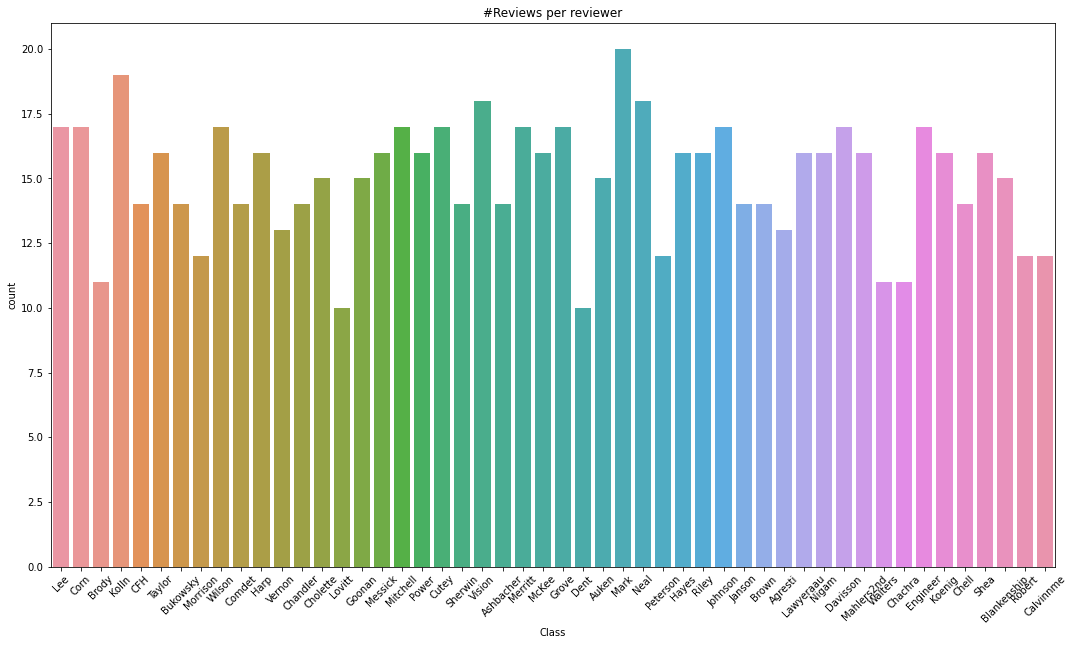

In [36]:
countplt, ax = plt.subplots(figsize = (18,10))
ax = sns.countplot(data=amazon_data_training, x='Class')
ax.set_title("#Reviews per reviewer")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [105]:
X_test = np.array(amazon_data_test.iloc[:,0:10000])
X = np.array(amazon_data_training.iloc[:,0:10000])
#nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
#distances, indices = nbrs.kneighbors(X)
y = np.array(amazon_data_training["Class"])
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
KNeighborsClassifier(...)
print(neigh.predict(X_test))
print(neigh.predict_proba(X_test))



['Cutey' 'Cutey' 'Chell' 'Blankenship' 'Bukowsky' 'Ashbacher' 'Goonan'
 'Bukowsky' 'Chell' 'Mark' 'Bukowsky' 'Brody' 'Johnson' 'Auken' 'Cutey'
 'Wilson' 'Mark' 'Wilson' 'Auken' 'Mark' 'Bukowsky' 'Lee' 'Lee' 'Brody'
 'Auken' 'Cutey' 'Lee' 'Comdet' 'Messick' 'Auken' 'Ashbacher' 'Mitchell'
 'Mahlers2nd' 'Auken' 'Cholette' 'Wilson' 'Ashbacher' 'Chell' 'Cutey'
 'Engineer' 'Cutey' 'Cutey' 'Cutey' 'Cutey' 'Ashbacher' 'Chell' 'Chell'
 'Chell' 'Chell' 'Cutey' 'Brody' 'Cutey' 'Mahlers2nd' 'Brody' 'Mahlers2nd'
 'Brody' 'Chell' 'Cutey' 'Mahlers2nd' 'Chell' 'Chell' 'Cutey' 'Brody'
 'Lovitt' 'Cutey' 'Auken' 'Johnson' 'Auken' 'Lee' 'Cutey' 'Cutey'
 'Chachra' 'Brody' 'Ashbacher' 'Brody' 'Brody' 'Mahlers2nd' 'Auken'
 'Mahlers2nd' 'Mahlers2nd' 'Cutey' 'Engineer' 'Cutey' 'Chell' 'Chell'
 'Auken' 'Cutey' 'Auken' 'Engineer' 'Mahlers2nd' 'Chell' 'Auken' 'Cutey'
 'Engineer' 'Johnson' 'Cutey' 'Auken' 'Brody' 'Brody' 'Chell' 'Auken'
 'Brody' 'Mahlers2nd' 'Chachra' 'Cutey' 'Chachra' 'Johnson' 'Brody'
 'Brody' '

In [90]:
A=np.array(amazon_data_test.iloc[5:6,0:10000])
print(X)
print(np.array(amazon_data_training["Class"].iloc[5:6]))


[[  0  22  11 ...   0   0   0]
 [  1  11   6 ...   0   0   0]
 [  2  11   2 ...   0   0   0]
 ...
 [747  11   3 ...   0   0   0]
 [748   6   1 ...   0   0   0]
 [749   8   7 ...   0   0   0]]
['CFH']
